In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)
test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3832728.24it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 128636.90it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 419391.51it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [4]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [5]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [6]:
train_data.targets.shape

torch.Size([60000])

In [7]:
from torch.utils.data import DataLoader 

loaders = {
    'train': DataLoader(dataset=train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(dataset=test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)
}

In [8]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x135f297c1d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x135f2952390>}

In [9]:
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50,10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2)) 
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)  
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x) 
        return F.softmax(x)     

In [10]:
import torch 

device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)}({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test(epoch):
    model.eval()
    test_loss = 0
    correct = 0 
    with torch.inference_mode():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy = {correct}/{len(loaders['test'].dataset)} ({100. * correct/ len(loaders['test'].dataset):.0f}%\n)")

In [11]:
for epoch in range(1,11):
    train(epoch)
    test(epoch)

c:\Users\Thoyajaksha Kashyap\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
C:\Users\Thoyajaksha Kashyap\AppData\Local\Temp\ipykernel_19952\2589193086.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000(0%)]	2.304908
Train Epoch: 1 [2000/60000(3%)]	2.274835
Train Epoch: 1 [4000/60000(7%)]	2.178362
Train Epoch: 1 [6000/60000(10%)]	2.048921
Train Epoch: 1 [8000/60000(13%)]	1.936804
Train Epoch: 1 [10000/60000(17%)]	1.934414
Train Epoch: 1 [12000/60000(20%)]	1.942286
Train Epoch: 1 [14000/60000(23%)]	1.857213
Train Epoch: 1 [16000/60000(27%)]	1.765370
Train Epoch: 1 [18000/60000(30%)]	1.766619
Train Epoch: 1 [20000/60000(33%)]	1.673455
Train Epoch: 1 [22000/60000(37%)]	1.598257
Train Epoch: 1 [24000/60000(40%)]	1.679322
Train Epoch: 1 [26000/60000(43%)]	1.642440
Train Epoch: 1 [28000/60000(47%)]	1.677540
Train Epoch: 1 [30000/60000(50%)]	1.545586
Train Epoch: 1 [32000/60000(53%)]	1.719895
Train Epoch: 1 [34000/60000(57%)]	1.601263
Train Epoch: 1 [36000/60000(60%)]	1.624784
Train Epoch: 1 [38000/60000(63%)]	1.627057
Train Epoch: 1 [40000/60000(67%)]	1.590897
Train Epoch: 1 [42000/60000(70%)]	1.634953
Train Epoch: 1 [44000/60000(73%)]	1.611942
Train Epoch: 1 [46000/

Prediction: 2


C:\Users\Thoyajaksha Kashyap\AppData\Local\Temp\ipykernel_19952\2589193086.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


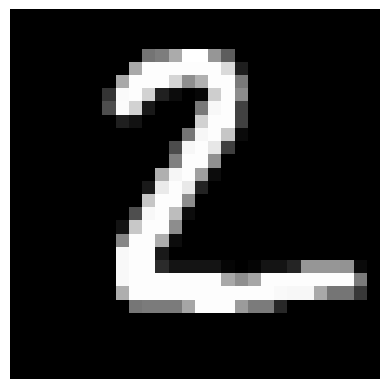

Prediction: 9


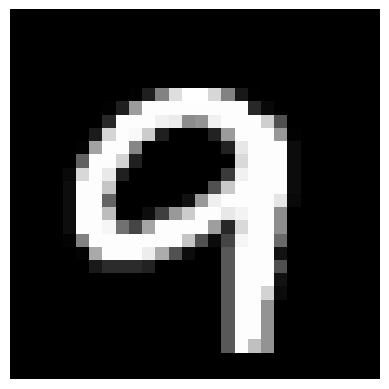

Prediction: 0


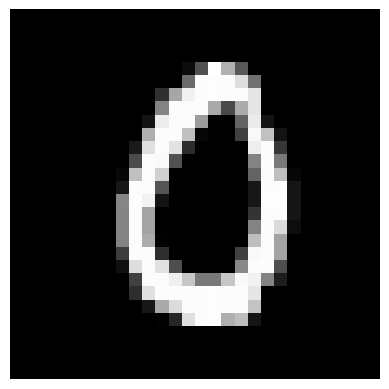

Prediction: 9


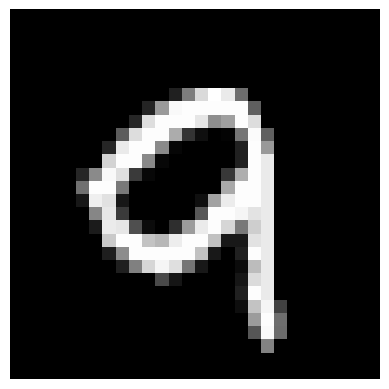

Prediction: 5


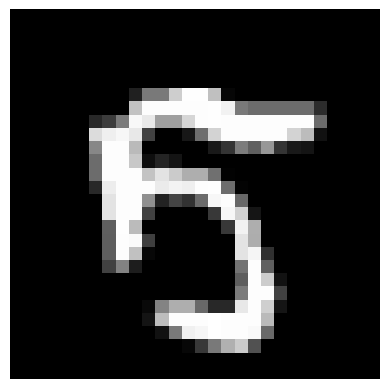

Prediction: 3


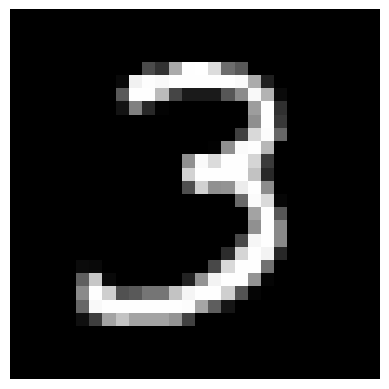

Prediction: 9


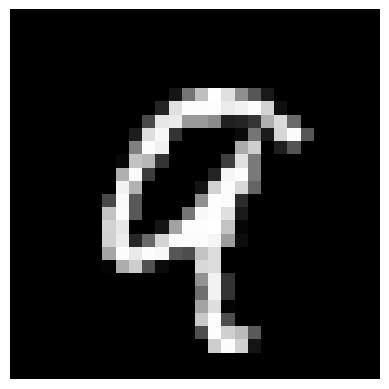

Prediction: 9


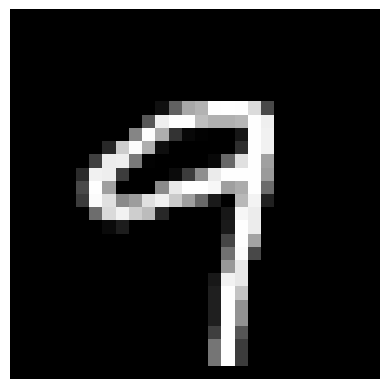

Prediction: 4


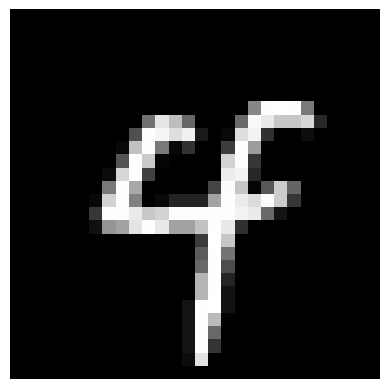

Prediction: 3


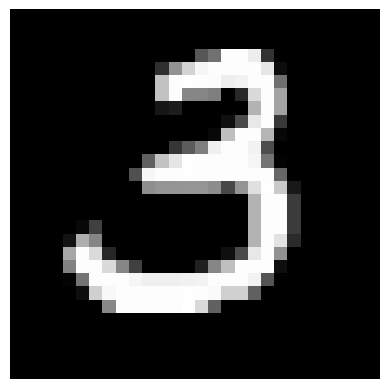

Prediction: 9


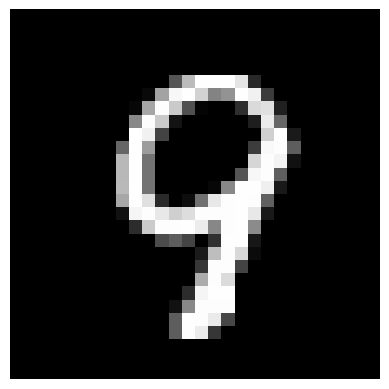

Prediction: 6


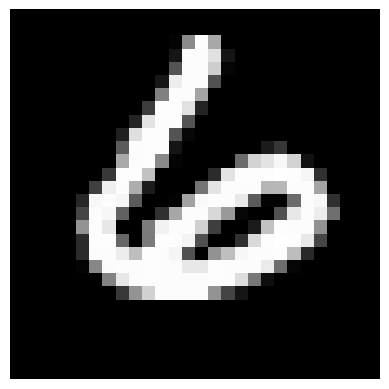

Prediction: 8


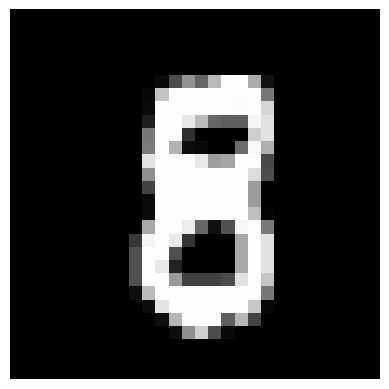

Prediction: 3


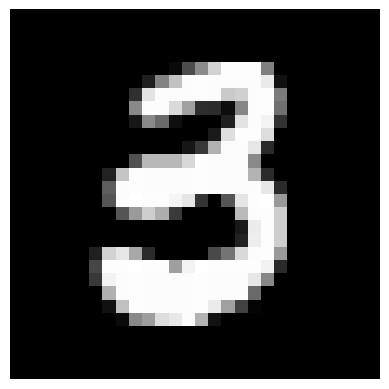

Prediction: 2


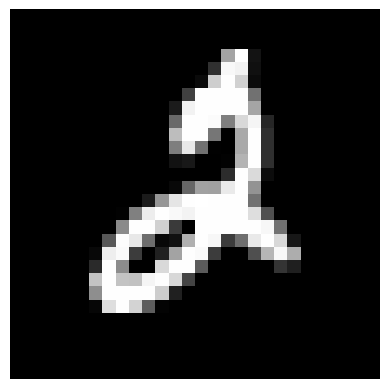

Prediction: 3


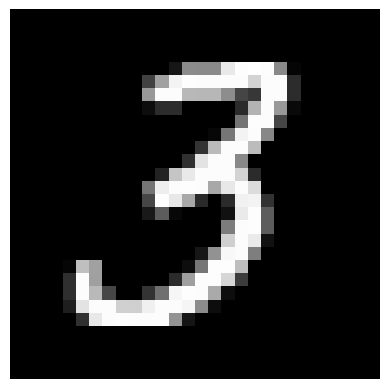

Prediction: 9


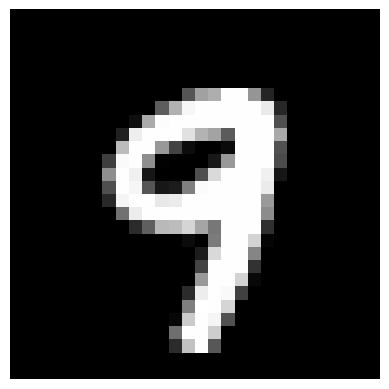

Prediction: 0


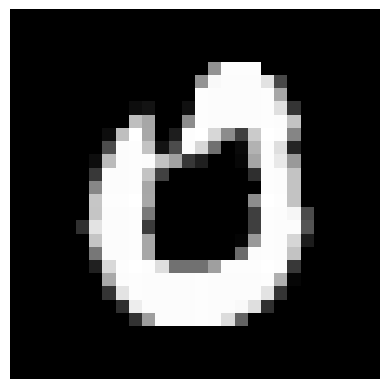

Prediction: 6


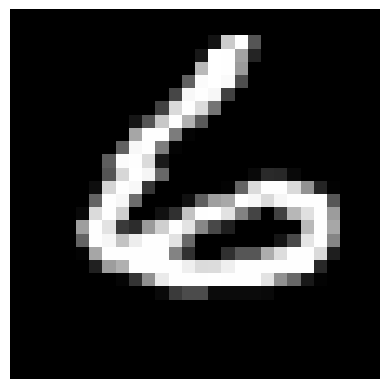

Prediction: 3


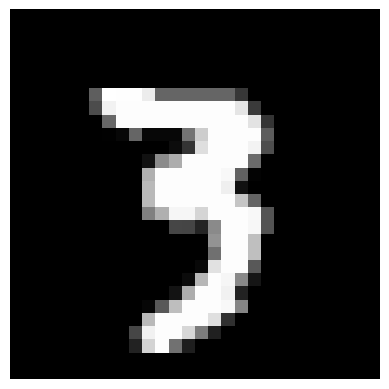

In [17]:
import matplotlib.pyplot as plt 
for i in range(1, 10000, 500):
    model.eval()
    data, target = test_data[i] 
    data = data.unsqueeze(0).to(device)
    output = model(data)
    prediction = output.argmax(dim=1, keepdim=True).item()
    print(f'Prediction: {prediction}')
    image = data.squeeze(0).squeeze(0).cpu().numpy()
    plt.imshow(image, cmap='gray')
    plt.axis(False)
    plt.show()